# xception model

In [1]:
!pip install kaggle

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d ashrafulhossenakash/alzheimer-disease-dataset

Dataset URL: https://www.kaggle.com/datasets/ashrafulhossenakash/alzheimer-disease-dataset
License(s): CC0-1.0
 95% 330M/346M [00:00<00:00, 733MB/s]
100% 346M/346M [00:00<00:00, 715MB/s]


In [4]:
!unzip /content/alzheimer-disease-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Alzheimer_Dataset_V2/val/MildDemented/12a063a9-013a-4e3b-a1b1-ce5d13f104f4.jpg  
  inflating: Alzheimer_Dataset_V2/val/MildDemented/12a5bfae-415d-4270-84a4-4a03ed4bd10e.jpg  
  inflating: Alzheimer_Dataset_V2/val/MildDemented/12ab79df-9c11-4556-9510-880b17e1767c.jpg  
  inflating: Alzheimer_Dataset_V2/val/MildDemented/138b76f5-22b8-4f82-af2f-9b3a6e829ee1.jpg  
  inflating: Alzheimer_Dataset_V2/val/MildDemented/1395cd00-5b6f-48f6-8c15-89639e9ee7e3.jpg  
  inflating: Alzheimer_Dataset_V2/val/MildDemented/13ab48b5-3e2e-4e5c-9e51-a372c421f58a.jpg  
  inflating: Alzheimer_Dataset_V2/val/MildDemented/13cb5f49-48df-4c91-91a8-538960127e8b.jpg  
  inflating: Alzheimer_Dataset_V2/val/MildDemented/13e9e97b-a65c-4d9e-9879-64453c250530.jpg  
  inflating: Alzheimer_Dataset_V2/val/MildDemented/13f3a663-10b2-4ded-b840-0b964a02b975.jpg  
  inflating: Alzheimer_Dataset_V2/val/MildDemented/13fc3077-5420-4b59-8a03-17241995140e.jpg  
  inflati

In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications import Xception
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adamax
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings("ignore")


In [6]:
train_dir = '/content/Alzheimer_Dataset_V2/train'
val_dir   = '/content/Alzheimer_Dataset_V2/val'
test_dir  = '/content/Alzheimer_Dataset_V2/test'


In [7]:
img_size = (244, 244)
batch_size = 32

datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.xception.preprocess_input)

train_data = datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

val_data = datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_data = datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 23788 images belonging to 4 classes.
Found 5097 images belonging to 4 classes.
Found 5099 images belonging to 4 classes.


In [12]:
base_model = Xception(include_top=False, weights='imagenet', input_shape=(*img_size, 3), pooling='max')
# base_model.trainable = False  # Optional: freeze for faster training

model = Sequential([
    base_model,
    Flatten(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(4, activation='softmax')
])

model.compile(optimizer=Adamax(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ (None, 2048)           │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,124,268 (80.58 MB)

 Trainable params: 21,069,740 (80.37 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [13]:
history = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data
)


Epoch 1/10
744/744 ━━━━━━━━━━━━━━━━━━━━ 489s 581ms/step - accuracy: 0.5990 - loss: 0.8815 - val_accuracy: 0.9298 - val_loss: 0.1851
Epoch 2/10
744/744 ━━━━━━━━━━━━━━━━━━━━ 434s 583ms/step - accuracy: 0.9585 - loss: 0.1201 - val_accuracy: 0.9780 - val_loss: 0.0642
Epoch 3/10
744/744 ━━━━━━━━━━━━━━━━━━━━ 417s 560ms/step - accuracy: 0.9848 - loss: 0.0439 - val_accuracy: 0.9562 - val_loss: 0.1634
Epoch 4/10
744/744 ━━━━━━━━━━━━━━━━━━━━ 416s 560ms/step - accuracy: 0.9903 - loss: 0.0280 - val_accuracy: 0.9843 - val_loss: 0.0511
Epoch 5/10
744/744 ━━━━━━━━━━━━━━━━━━━━ 417s 560ms/step - accuracy: 0.9919 - loss: 0.0251 - val_accuracy: 0.9790 - val_loss: 0.0767
Epoch 6/10
744/744 ━━━━━━━━━━━━━━━━━━━━ 417s 560ms/step - accuracy: 0.9945 - loss: 0.0181 - val_accuracy: 0.9759 - val_loss: 0.0854
Epoch 7/10
744/744 ━━━━━━━━━━━━━━━━━━━━ 416s 559ms/step - accuracy: 0.9966 - loss: 0.0118 - val_accuracy: 0.9776 - val_loss: 0.0816
Epoch 8/10
744/744 ━━━━━━━━━━━━━━━━━━━━ 416s 559ms/step - accuracy: 0.9960 -

In [15]:
model.save("Xception_Alzheimer_after_split.keras")


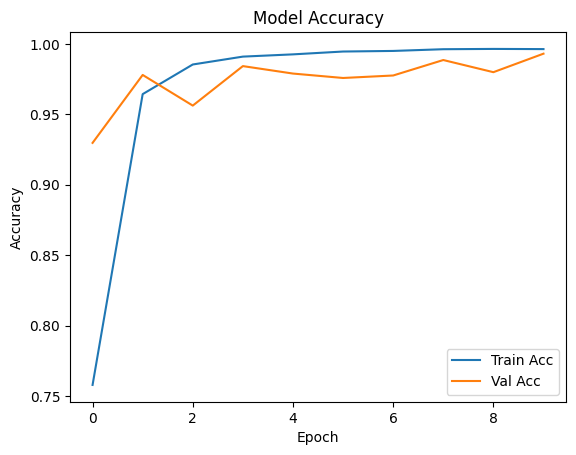

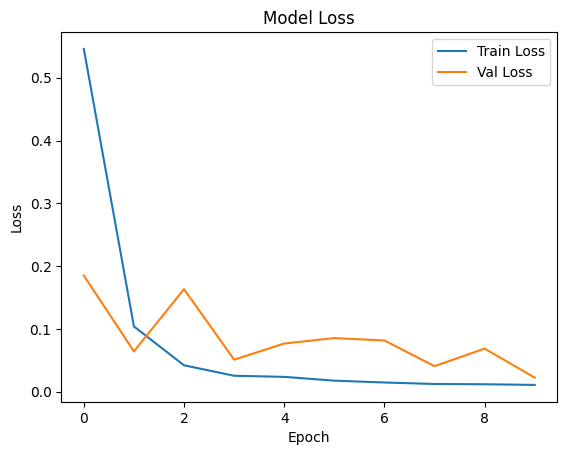

In [16]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


160/160 ━━━━━━━━━━━━━━━━━━━━ 32s 186ms/step
Classification Report:
                  precision    recall  f1-score   support

    MildDemented       0.99      1.00      0.99      1344
ModerateDemented       1.00      1.00      1.00       971
     NonDemented       0.99      0.99      0.99      1440
VeryMildDemented       0.99      0.98      0.99      1344

        accuracy                           0.99      5099
       macro avg       0.99      0.99      0.99      5099
    weighted avg       0.99      0.99      0.99      5099



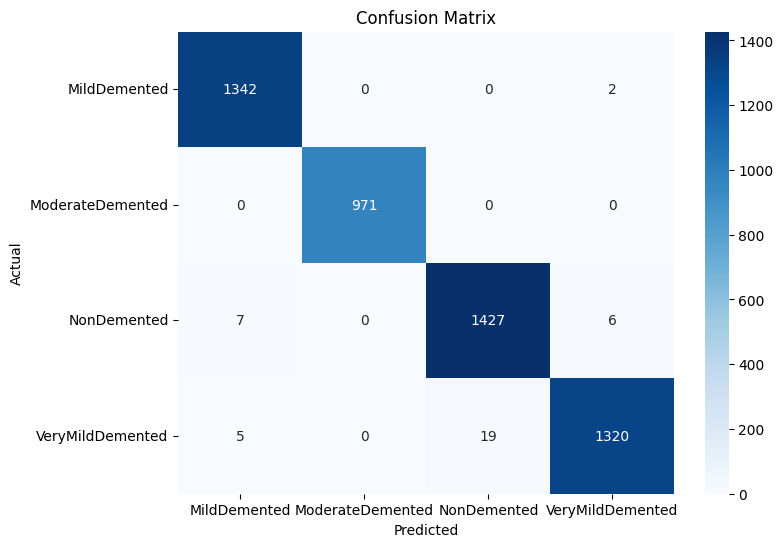

In [17]:
pred_probs = model.predict(test_data)
pred_classes = np.argmax(pred_probs, axis=1)
true_classes = test_data.classes
class_labels = list(test_data.class_indices.keys())

print("Classification Report:")
print(classification_report(true_classes, pred_classes, target_names=class_labels))

cm = confusion_matrix(true_classes, pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [19]:
from sklearn.metrics import classification_report
import pandas as pd

# Get classification report as dictionary
report_dict = classification_report(true_classes, pred_classes, target_names=class_labels, output_dict=True)

# Convert to DataFrame and keep relevant metrics
f1_df = pd.DataFrame(report_dict).transpose()
f1_df = f1_df[['precision', 'recall', 'f1-score', 'support']]

# Style the table
f1_df.style.background_gradient(cmap='YlGnBu', axis=1).format(precision=2)


,precision,recall,f1-score,support
MildDemented,0.99,1.00,0.99,1344.00
ModerateDemented,1.00,1.00,1.00,971.00
NonDemented,0.99,0.99,0.99,1440.00
VeryMildDemented,0.99,0.98,0.99,1344.00
accuracy,0.99,0.99,0.99,0.99
macro avg,0.99,0.99,0.99,5099.00
weighted avg,0.99,0.99,0.99,5099.00


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


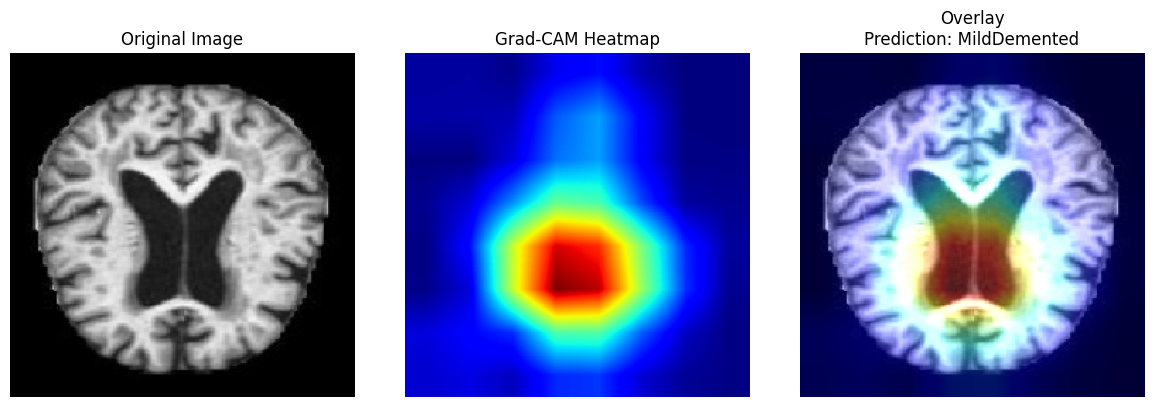

In [21]:
import cv2
import matplotlib.cm as cm
from tensorflow.keras.models import Model

# Get a sample image from test_data
img_batch, label_batch = test_data[0]  # 1st batch
img = img_batch[0:1]  # Single image (batch size 1)
label = label_batch[0:1]

# Predict and get class
preds = model.predict(img)
pred_class_idx = np.argmax(preds[0])
class_labels = list(test_data.class_indices.keys())
predicted_label = class_labels[pred_class_idx]

# Access the inner Xception model
xception_model = model.layers[0]
last_conv_layer_name = "block14_sepconv2_act"
last_conv_layer = xception_model.get_layer(last_conv_layer_name)

# Build a model that maps input to activations and output
grad_model = Model(inputs=xception_model.input,
                   outputs=[last_conv_layer.output, xception_model.output])

# Compute gradient of the class score with respect to feature map
with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model(img)
    loss = predictions[:, pred_class_idx]

grads = tape.gradient(loss, conv_outputs)[0]
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
conv_outputs = conv_outputs[0]

# Multiply channels by importance
heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_outputs), axis=-1)
heatmap = np.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)

# Resize and overlay heatmap on original image
heatmap_resized = cv2.resize(heatmap.numpy(), (img.shape[2], img.shape[1]))
heatmap_colored = cm.jet(heatmap_resized)[:, :, :3]
img_orig = (img[0] + 1) / 2  # Rescale to [0,1]
superimposed = heatmap_colored * 0.4 + img_orig

# Plot
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(img_orig)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(heatmap_resized, cmap='jet')
plt.title("Grad-CAM Heatmap")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(superimposed)
plt.title(f"Overlay\nPrediction: {predicted_label}")
plt.axis('off')

plt.tight_layout()
plt.show()


In [22]:
from sklearn.metrics import classification_report
import pandas as pd

# Compute predictions
pred_probs = model.predict(test_data)
pred_classes = np.argmax(pred_probs, axis=1)
true_classes = test_data.classes

# Generate classification report
report = classification_report(true_classes, pred_classes, output_dict=True)
avg_metrics = report['weighted avg']

# Build summary table
summary = {
    "Epochs": [len(history.history['accuracy'])],
    "Accuracy (%)": [round(history.history['val_accuracy'][-1]*100, 2)],
    "Loss": [round(history.history['val_loss'][-1], 4)],
    "Precision (%)": [round(avg_metrics['precision']*100, 2)],
    "Recall (%)": [round(avg_metrics['recall']*100, 2)],
    "F1-Score (%)": [round(avg_metrics['f1-score']*100, 2)],
    "Error Rate": [round(100 - history.history['val_accuracy'][-1]*100, 2)]
}

# Display as DataFrame
summary_df = pd.DataFrame(summary)
summary_df.style.background_gradient(cmap='Blues', axis=1).format(precision=2)


160/160 ━━━━━━━━━━━━━━━━━━━━ 24s 147ms/step


,Epochs,Accuracy (%),Loss,Precision (%),Recall (%),F1-Score (%),Error Rate
0,10,99.31,0.02,99.24,99.24,99.23,0.69
